In [ ]:

import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
audio1 = "/content/drive/MyDrive/abc/dsp/16000_pcm_speeches/noise/other/exercise_bike.wav"
audio2 = "/content/drive/MyDrive/abc/dsp/16000_pcm_speeches/noise/other/pink_noise.wav"
audio3 = "/content/drive/MyDrive/abc/dsp/16000_pcm_speeches/noise/_background_noise_/10convert.com_Audience-Claps_daSG5fwdA7o.wav"
audio4 = "/content/drive/MyDrive/abc/dsp/debussy.wav"

In [ ]:
# load audio files with librosa
au1, _ = librosa.load(audio1)
au2, _ = librosa.load(audio2)
au3, _ = librosa.load(audio3)
au4, _ = librosa.load(audio4)

In [ ]:
au1

array([ 1.0205542e-09, -3.4779105e-10,  6.3163735e-10, ...,
        3.4299367e-03,  5.2669743e-04,  0.0000000e+00], dtype=float32)

In [ ]:
Frame_size = 1024
Hop_Length = 512

**RMSE from scratch**

In [ ]:
def rmse(signal, frame_size, hop_length):
  rmse = []
  # Formula for calculating REMS value
  for i in range(0, len(signal), hop_length):
    rmse_current_frame = np.sqrt(sum(signal[i : i + frame_size]**2)/frame_size)
    rmse.append(rmse_current_frame)
  return np.array(rmse)


In [ ]:
rmse_au1 = rmse(au1, frame_size=Frame_size, hop_length=Hop_Length)
rmse_au2 = rmse(au2, frame_size=Frame_size, hop_length=Hop_Length)
rmse_au3 = rmse(au3, frame_size=Frame_size, hop_length=Hop_Length)
rmse_au4 = rmse(au4, frame_size=Frame_size, hop_length=Hop_Length)

In [ ]:
frames1 = range(len(rmse_au1))
t1 = librosa.frames_to_time(frames1, hop_length=Hop_Length)
frames2 = range(len(rmse_au2))
t2 = librosa.frames_to_time(frames2, hop_length=Hop_Length)
frames4 = range(len(rmse_au4))
t4 = librosa.frames_to_time(frames4, hop_length=Hop_Length)

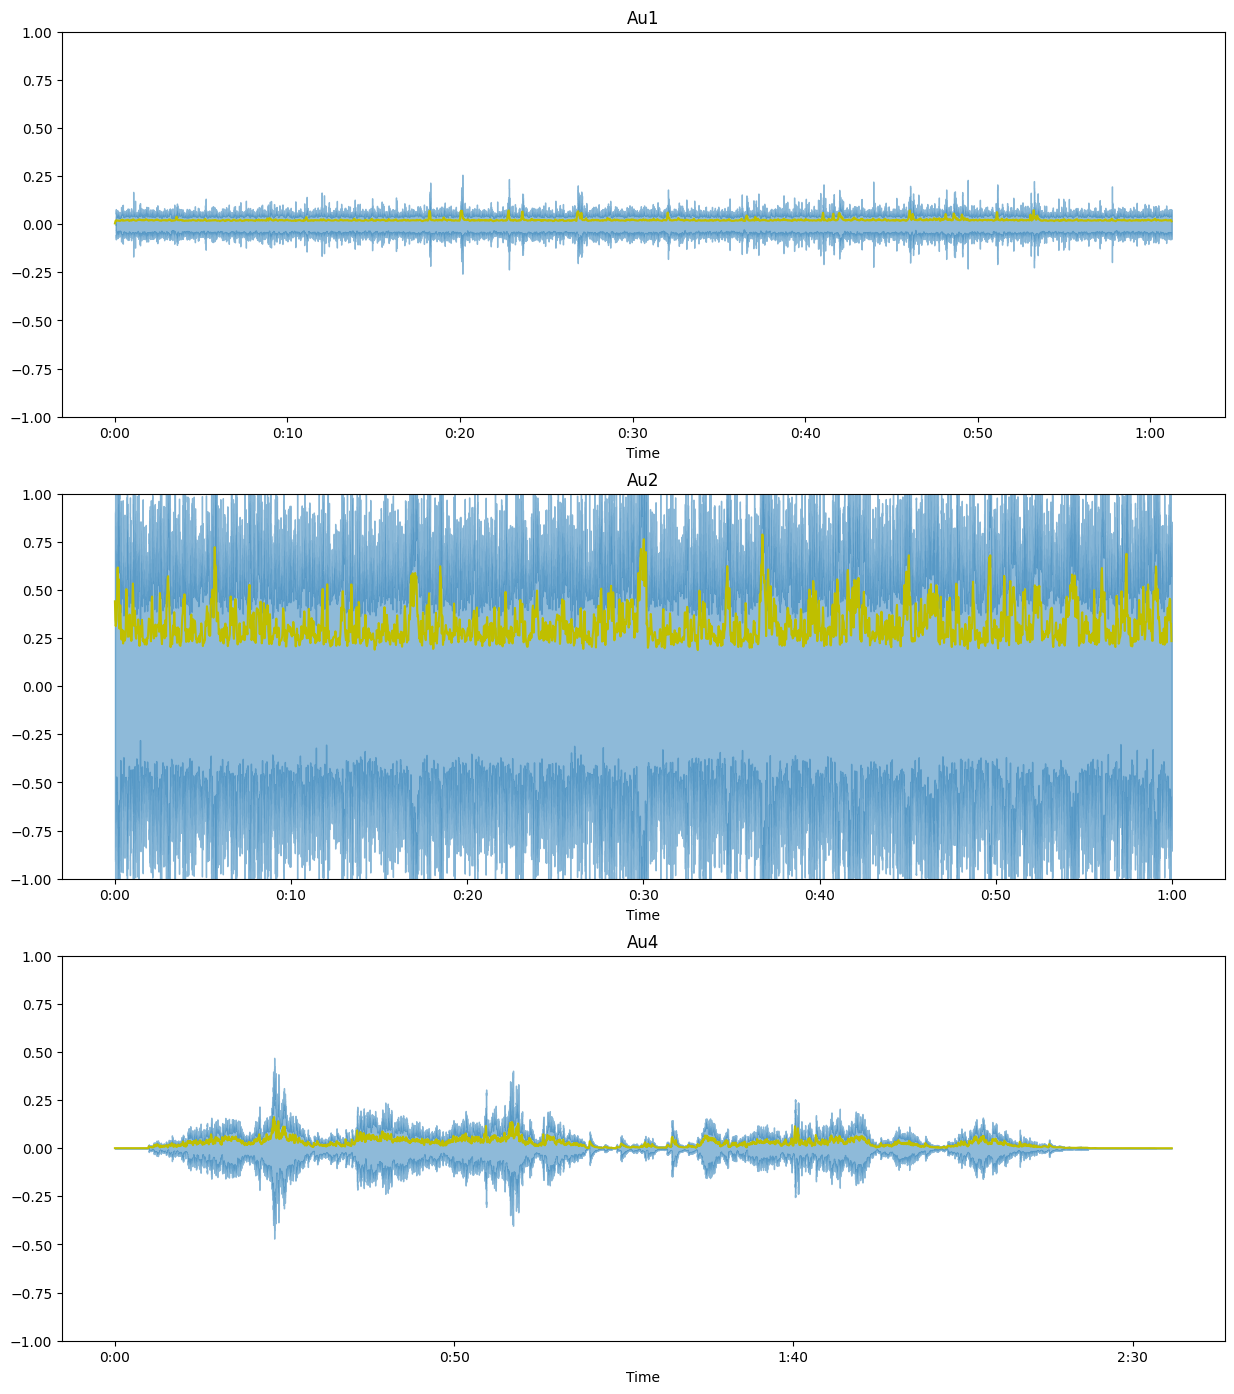

In [ ]:
plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(au1, alpha=0.5)
# plt.plot(t1, rms_au1, color="r")
plt.plot(t1, rmse_au1, color="y")
plt.ylim((-1, 1))
plt.title("Au1")

plt.subplot(3, 1, 2)
librosa.display.waveshow(au2, alpha=0.5)
# plt.plot(t, rms_redhot, color="r")
plt.plot(t2, rmse_au2, color="y")
plt.ylim((-1, 1))
plt.title("Au2")

plt.subplot(3, 1, 3)
librosa.display.waveshow(au4, alpha=0.5)
# plt.plot(t, rms_duke, color="r")
plt.plot(t4, rmse_au4, color="y")
plt.ylim((-1, 1))
plt.title("Au4")

plt.show()

In [ ]:
FRAME_LENGTH = 1024
HOP_LENGTH = 512


**ZCR**

In [ ]:
zcr_au1 = librosa.feature.zero_crossing_rate(au1, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
zcr_au2 = librosa.feature.zero_crossing_rate(au2, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
zcr_au4 = librosa.feature.zero_crossing_rate(au4, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)